In [1]:
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import cv2
import sc2

%pylab inline

sc2.utils.jit.enable()
sc2.utils.imageio.configurate("default_show_mode", "plt")

Populating the interactive namespace from numpy and matplotlib


# Original Image

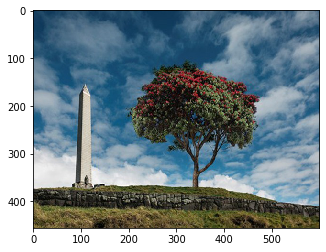

In [2]:
image = sc2.utils.image_load("tree")
sc2.utils.image_show(image)

In [3]:
backup = np.copy(image)

In [4]:
# decide how many seams to remove
steps = int(image.shape[1] * 0.2)

# Conservative Seam Carving

100%|██████████| 120/120 [00:06<00:00, 17.54it/s]


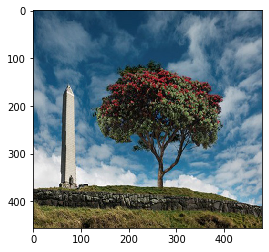

In [5]:
image = np.copy(backup)
# remove seams normally
for i in tqdm.tqdm(range(steps)):
    energy = sc2.energy.laplacian(image)
    seam = sc2.seamops.detect_seam(energy)
    image = sc2.seamops.remove_seam(image, seam)
# have a look
sc2.utils.image_show(image)

# Seam Carving with Importance Diffusion
- **基本假设：图像的信息是连续的，即被移除seam的相邻像素点保存了部分被移除seam的信息**
- **应当增加seam邻域内像素点的权重，因为它们包含了原图中更多的信息**
- **$v(x,y) \leftarrow v(x,y) + w(x,s_y)p(v(s_y,y))$，
其中$s_y$为一条seam，$v$为像素点权重，$w$判定是否相邻，$p$为权重增加比例**

100%|██████████| 120/120 [00:05<00:00, 21.34it/s]


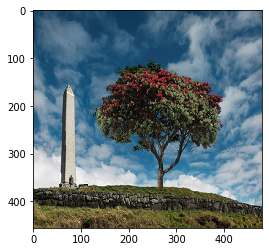

In [6]:
image = np.copy(backup)

# remove seams with diffusion
energy = sc2.energy.laplacian(image)
diffusion = np.zeros_like(energy)
for i in tqdm.tqdm(range(steps)):
    seam = sc2.seamops.detect_seam(energy + diffusion)
    image = sc2.seamops.remove_seam(image, seam)
    diffusion = sc2.advanced.diffusion(energy, seam, p=0.5)
    diffusion = sc2.seamops.remove_seam(diffusion, seam)
    energy = sc2.energy.laplacian(image)

sc2.utils.image_show(image)

In [7]:
# TODO: find a better example